In [68]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2]
    return f

# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.5
# Spring constants
k1 = 8.0
k2 = 12.0
# Natural lengths
L1 = 0.5
L2 = 1.0
# Friction coefficients
b1 = 0.8
b2 = 0.5

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.5
y1 = 0.0
x2 = 2.25
y2 = 0.0






        


In [69]:
# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

In [70]:
# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

In [71]:
# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)
wsol

array([[ 5.00000000e-01,  0.00000000e+00,  2.25000000e+00,
         0.00000000e+00],
       [ 5.07153881e-01,  3.53025842e-01,  2.24519578e+00,
        -2.38077459e-01],
       [ 5.27995283e-01,  6.79195769e-01,  2.23102095e+00,
        -4.65444875e-01],
       [ 5.61162827e-01,  9.64724969e-01,  2.20804714e+00,
        -6.75172710e-01],
       [ 6.04781082e-01,  1.19788588e+00,  2.17710838e+00,
        -8.61168001e-01],
       [ 6.56552344e-01,  1.36942866e+00,  2.13926279e+00,
        -1.01839047e+00],
       [ 7.13862543e-01,  1.47289150e+00,  2.09574689e+00,
        -1.14302124e+00],
       [ 7.73897415e-01,  1.50478962e+00,  2.04792404e+00,
        -1.23257811e+00],
       [ 8.33763795e-01,  1.46467823e+00,  1.99722937e+00,
        -1.28597399e+00],
       [ 8.90610885e-01,  1.35509098e+00,  1.94511353e+00,
        -1.30351789e+00],
       [ 9.41746585e-01,  1.18135985e+00,  1.89298756e+00,
        -1.28686023e+00],
       [ 9.84744496e-01,  9.51326861e-01,  1.84217101e+00,
      

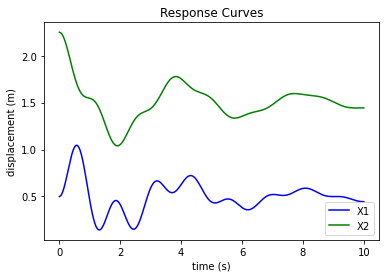

In [72]:
 # Plot the solution that was generated

import matplotlib.pyplot as plt

plt.plot(t, wsol[:,0], 'b')
plt.plot(t, wsol[:,2], 'g')


plt.xlabel('time (s)')
plt.ylabel('displacement (m)')
plt.title('Response Curves')
plt.legend(['X1','X2', 'error', 'relError'], loc='lower right')
plt.show()

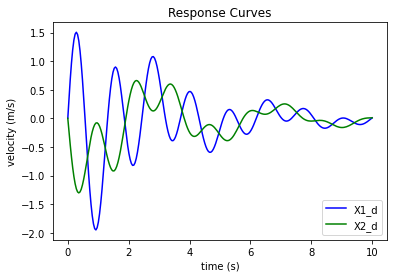

In [73]:
plt.plot(t, wsol[:,1], 'b')
plt.plot(t, wsol[:,3], 'g')


plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.title('Response Curves')
plt.legend(['X1_d','X2_d', 'error', 'relError'], loc='lower right')
plt.show()